# Project Case Scenario
**Project Scenario**: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?

* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

Details regarding the project will be broken down in the next reading sections.

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from math import sqrt


In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [6]:
len(boston_df.isnull().sum(axis = 1))

506

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

* Create a histogram for the pupil to teacher ratio variable

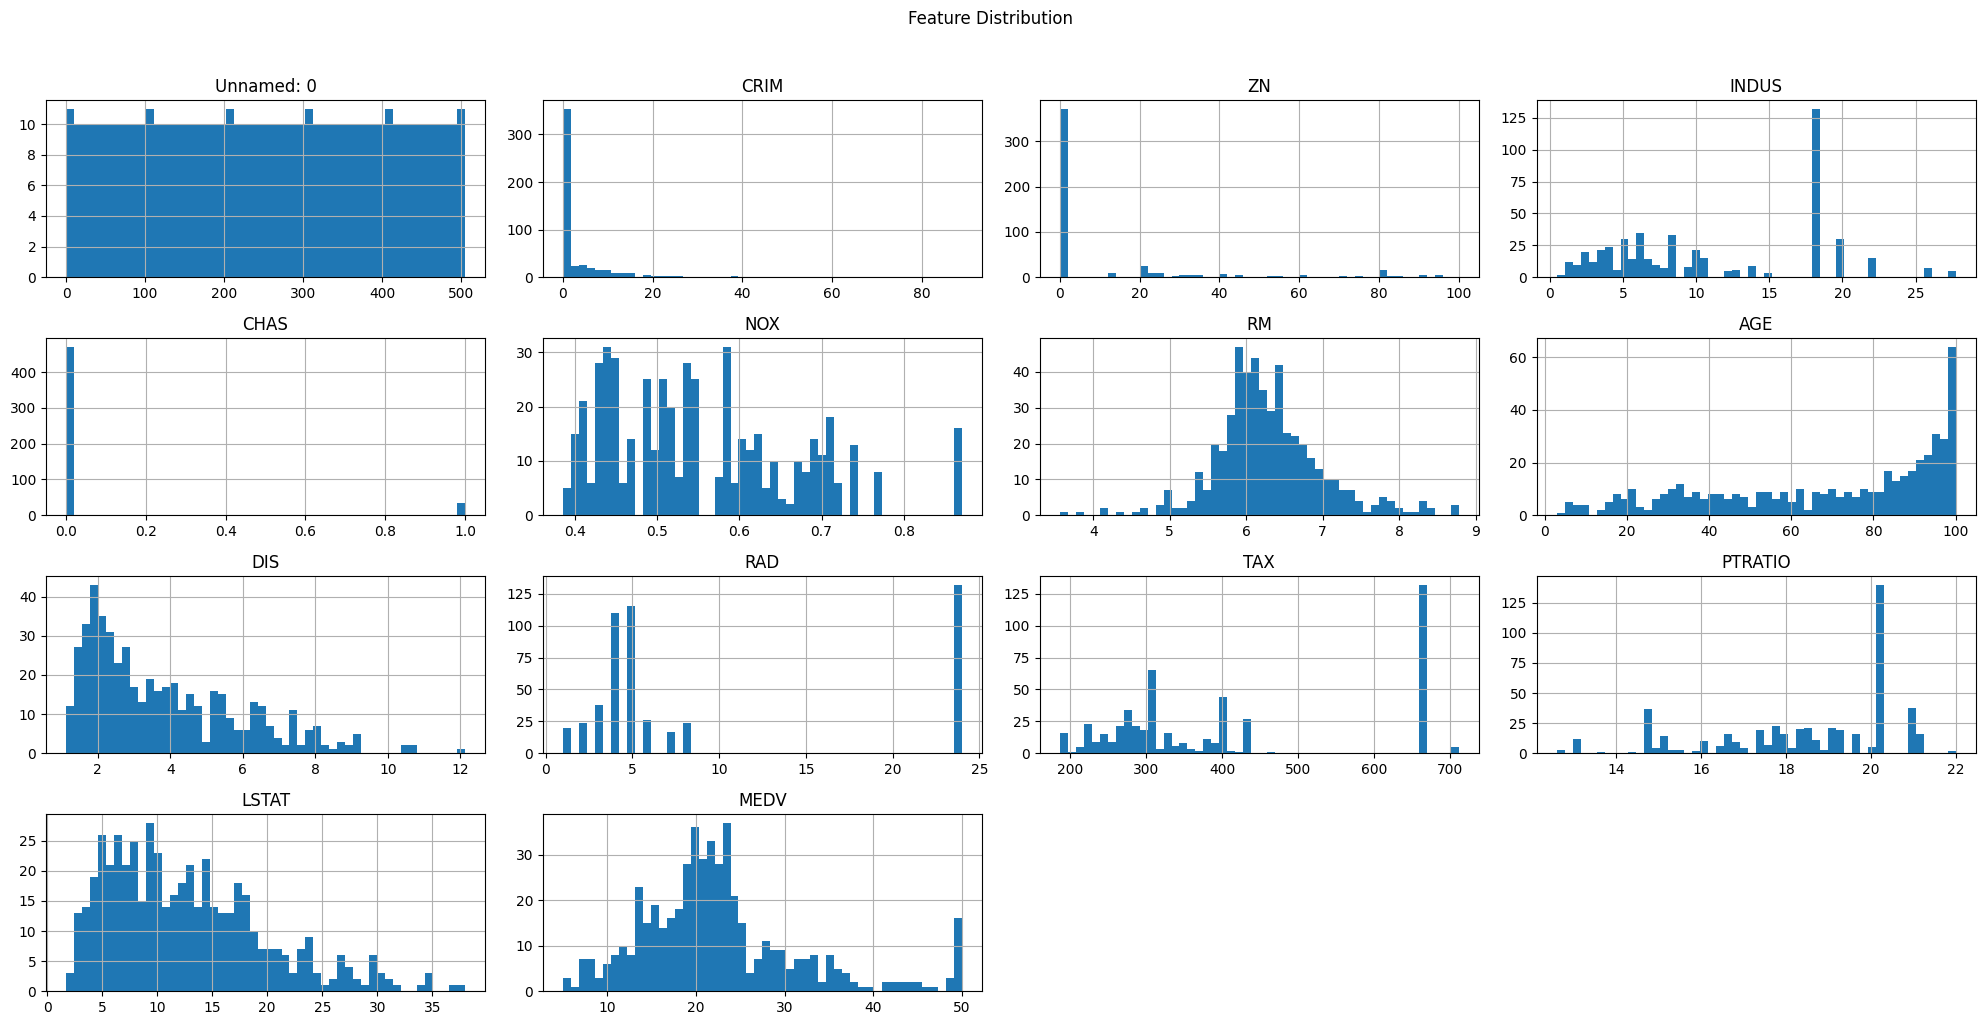

In [7]:
boston_df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

## For the "Median value of owner-occupied homes" provide a boxplot

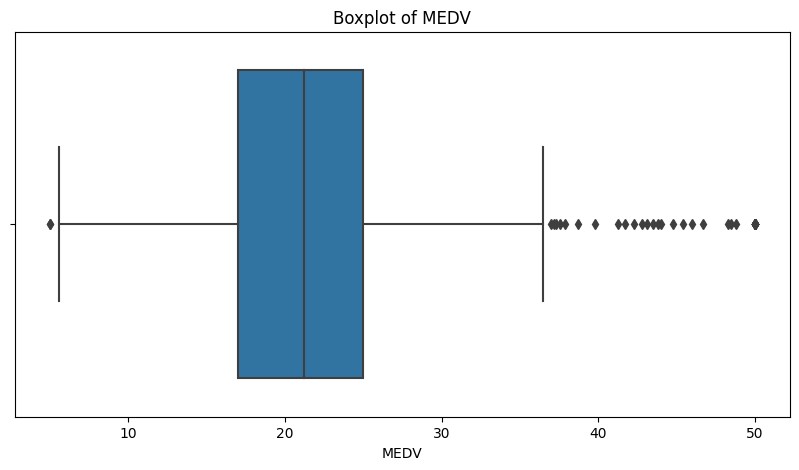

In [8]:
plt.figure(figsize = (10,5))
ax = sns.boxplot(x = "MEDV", data = boston_df)
plt.title("Boxplot of MEDV")
plt.show()

## Provide a bar plot for the Charles river variable

<ipython-input-9-e918ecad4f83>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df["CHAS"], kde = False)


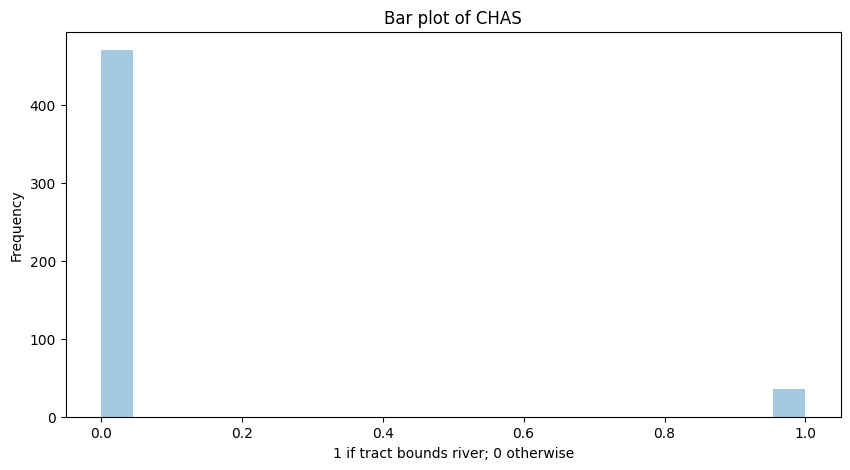

In [9]:
plt.figure(figsize = (10,5))
ax = sns.distplot(boston_df["CHAS"], kde = False)
plt.title("Bar plot of CHAS")
plt.xlabel("1 if tract bounds river; 0 otherwise")
plt.ylabel("Frequency")

plt.show()

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [10]:
boston_df.loc[(boston_df["AGE"] <= 35), "Age_grp"] = "35 and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "Age_grp"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "Age_grp"] = "70 and older"

In [11]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_grp
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


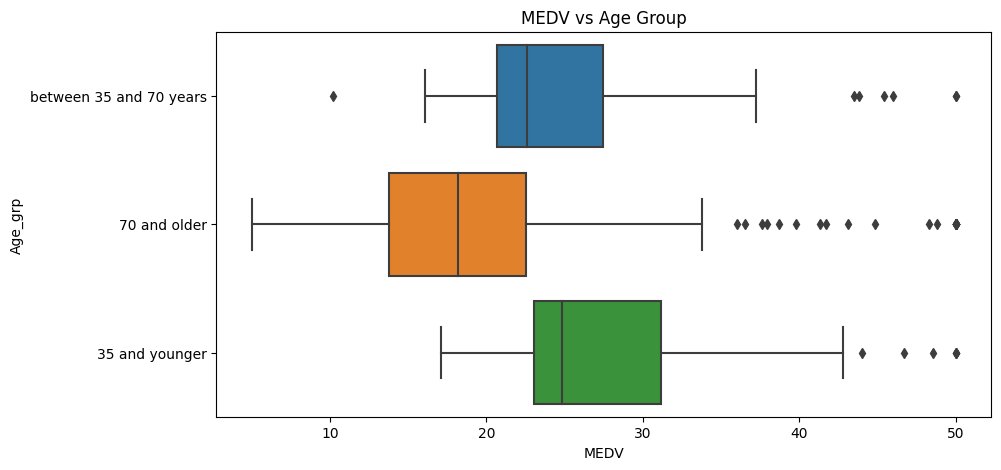

In [12]:
plt.figure(figsize = (10,5))
ax = sns.boxplot(x = "MEDV", y = "Age_grp", data = boston_df)
plt.title("MEDV vs Age Group")
plt.show()

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<Axes: xlabel='NOX', ylabel='INDUS'>

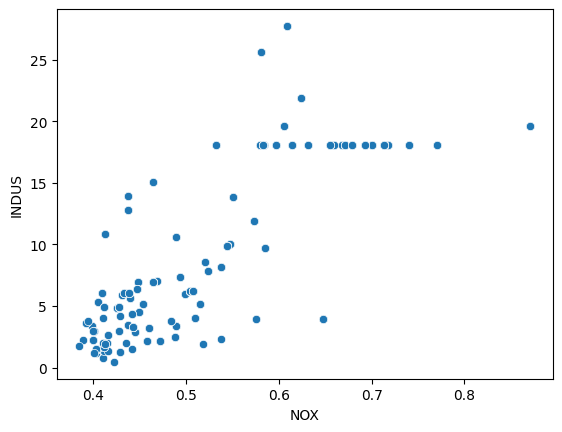

In [13]:
sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)

In [14]:
X = boston_df["NOX"]
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           7.91e-98
Time:                        12:18:13   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The correlation coefficient is 0.76, it means it has a positive correlation between the NOX and INDUS variables

## Create a histogram for the pupil to teacher ratio variable

<ipython-input-15-8d3e3fe646b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df["PTRATIO"], kde = True)


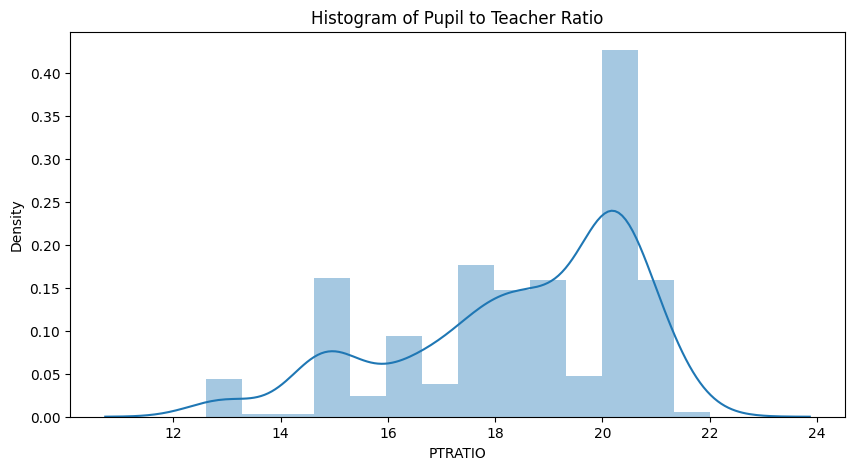

In [15]:
plt.figure(figsize = (10,5))
ax = sns.distplot(boston_df["PTRATIO"], kde = True)
plt.title("Histogram of Pupil to Teacher Ratio")

plt.show()

** For each of the following questions; **

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?*  (Pearson Correlation)

* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

** Be sure to: **

* State your hypothesis.

* Use α = 0.05

* Perform the test Statistics.

* State the conclusion from the test.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis: There's no significant difference in median value between houses bounded and not bounded by the Charles River

Alternative Hypothesis: There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [16]:
scipy.stats.levene(boston_df[boston_df["CHAS"] == 1]["MEDV"],
                   boston_df[boston_df["CHAS"] == 0]["MEDV"])

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [29]:
 scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 1]["MEDV"],
                   boston_df[boston_df["CHAS"] == 0]["MEDV"], equal_var = False)

<ipython-input-29-e6081a5ce3d8>:1: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 1]["MEDV"],


TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion**: Since the p-value is less than alpha value of 0.05, we reject the null hypthosis of having no significant difference in median values.



## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis: There's no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

Alternative Hypothesis: There's a significant difference Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [33]:
scipy.stats.levene(boston_df[boston_df["Age_grp"] == "35 and younger"]["MEDV"],
                  boston_df[boston_df["Age_grp"] == 'between 35 and 70 years']["MEDV"],
                  boston_df[boston_df["Age_grp"] =='70 and older']["MEDV"], center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [34]:
lower = boston_df[boston_df["Age_grp"] == "35 and younger"]["MEDV"]
middle = boston_df[boston_df["Age_grp"] == 'between 35 and 70 years']["MEDV"]
upper = boston_df[boston_df["Age_grp"] =='70 and older']["MEDV"]

In [35]:
f_statistic, p_value = scipy.stats.f_oneway(lower, middle, upper)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: Since the p-value is less than alpha value of 0.05, we reject the null hypthosis of having no significant difference in median values.



## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?* (Pearson Correlation)

In [39]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**Conclusion**: With a correlation coefficient of 0.76 strongly suggest that there is a positive relationship between NOX and INDUS

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [40]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        12:48:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion** : the DIS coefficient of 1.0916 entails that the weighted distance to employment centers has a statistically significant impact on median home values. However, the relatively low R-squared value suggests that while this factor is significant, it doesn't explain a large proportion of the variability in home values.